In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

### **Setting some display setting**

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
sns.set(style="whitegrid")

### **Loading Are Dataset**

In [4]:
df = pd.read_csv("german_credit_data.csv")

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


### EXPLORATORY DATA ANALYSIS

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.shape

(1000, 11)

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**To see the unique values of each column of ly dataset**

In [9]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique())
    print("-" * 50)

Unnamed: 0: 1000 unique values
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

### **Handling the missing values**

**Cheching for the prsence of missing values**

In [10]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

**Checking for the presence of duplicated rows**

In [11]:
df.duplicated().sum()

0

In [12]:
df = df.copy()
df = df.dropna().reset_index(drop=True)

In [13]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


### **Some Visualisations**

In [14]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

**Droping the Unnamed: 0 colummn**

In [15]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [17]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,40,male,3,own,little,little,3857,30,car,good
520,23,male,2,free,little,little,1845,45,radio/TV,bad


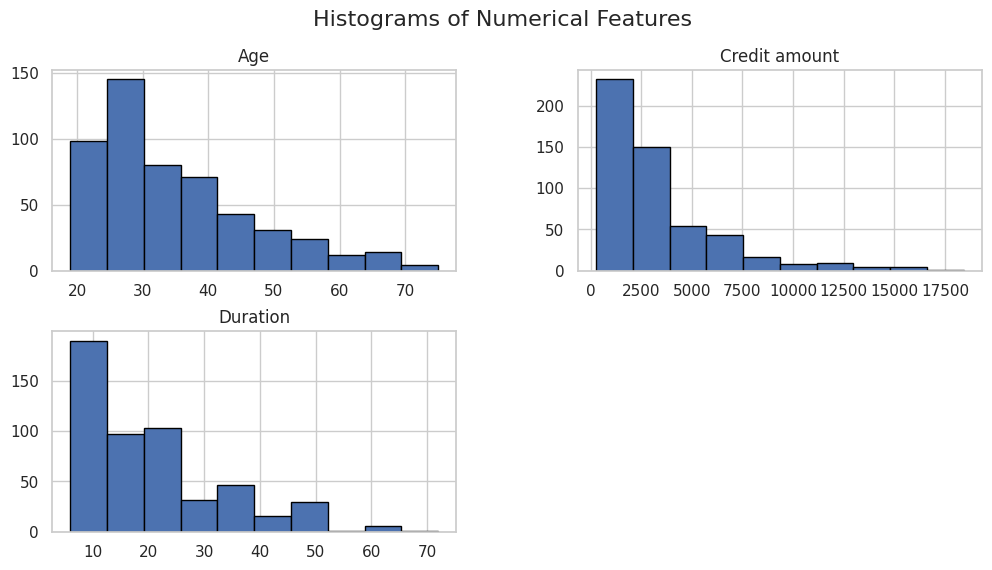

In [18]:
df[['Age', 'Credit amount', 'Duration']].hist(bins=10, edgecolor='black', figsize=(12, 6))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

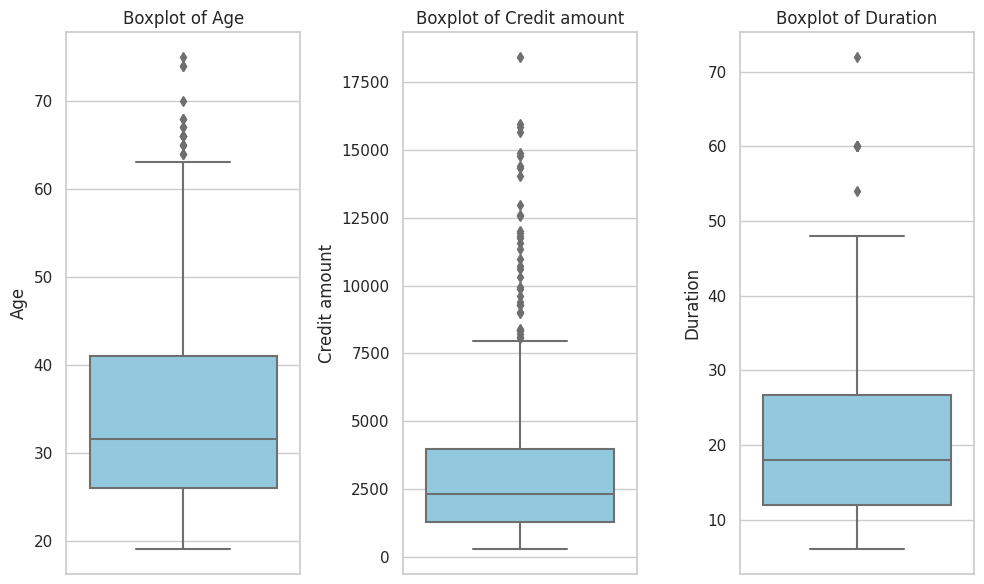

In [19]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Age', 'Credit amount', 'Duration'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [20]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


### **Now for the categorical columns**

In [21]:
categorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

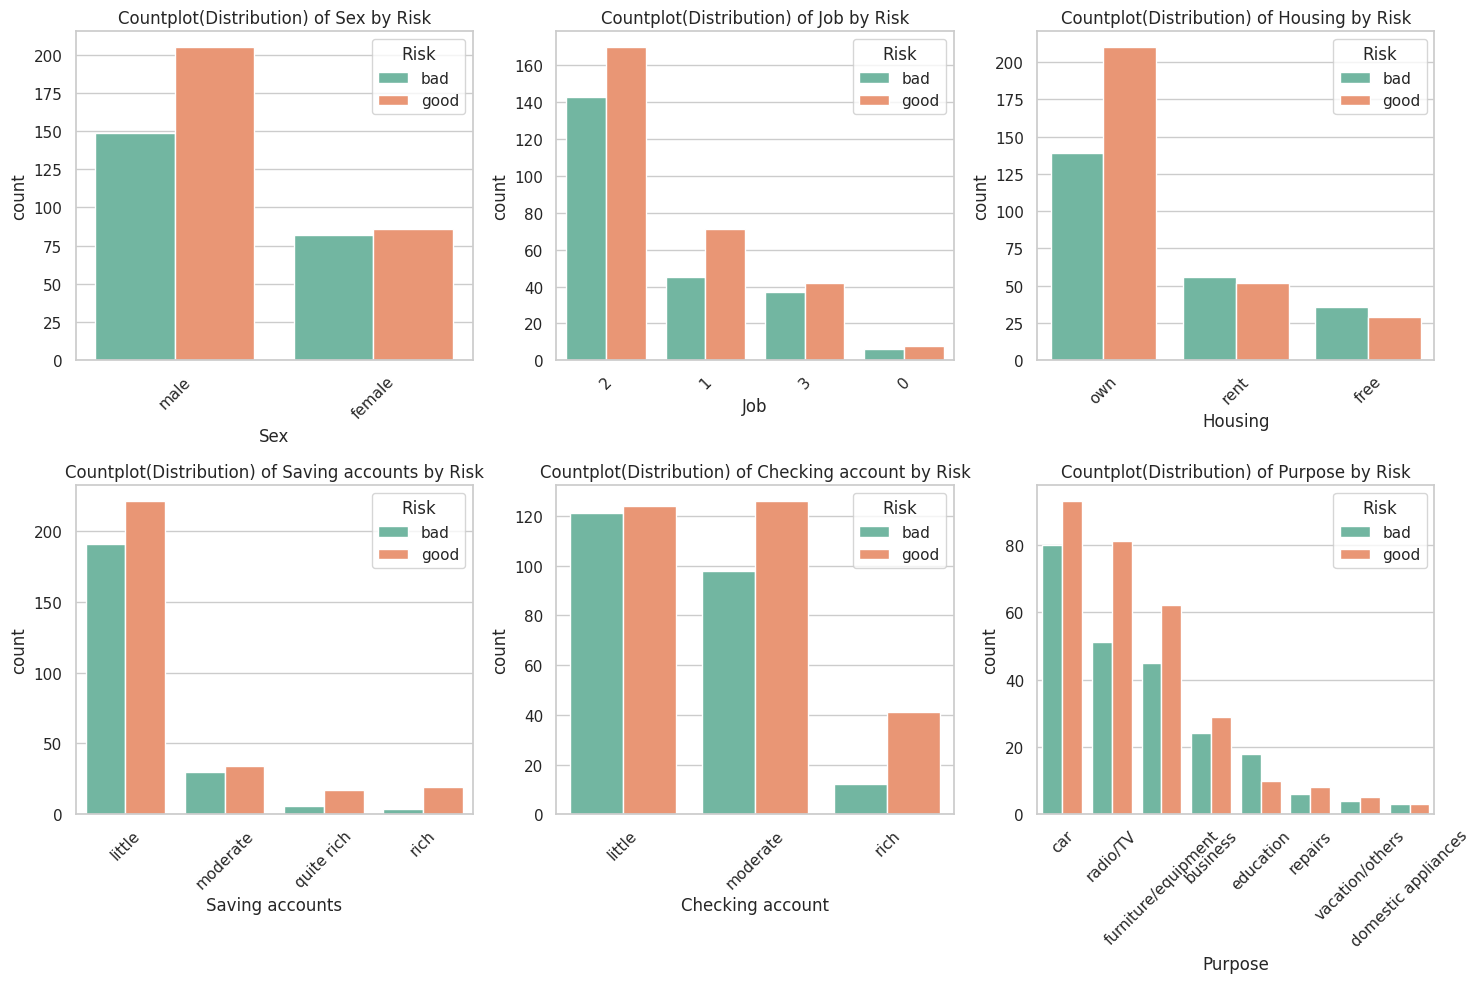

In [22]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue='Risk', palette='Set2', order=df[col].value_counts().index)
    plt.title(f'Countplot(Distribution) of {col} by Risk')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### **Let create and Visualisation a Correction Matrice of some of the columns of my dataset**

In [23]:
corr = df[['Age', 'Job', 'Credit amount', 'Duration']].corr()

In [24]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


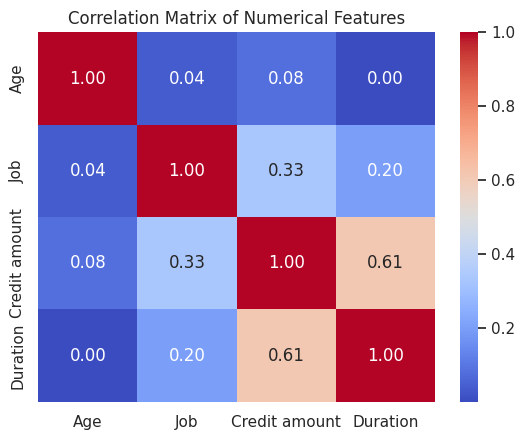

In [25]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Let see te average credit amiunt by job type and Sexe**

In [26]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [27]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [28]:
pd.pivot_table(df, values='Credit amount', index='Housing', columns='Purpose')

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


**Lets Check the relationship between Age, Credit Amount and Duration**

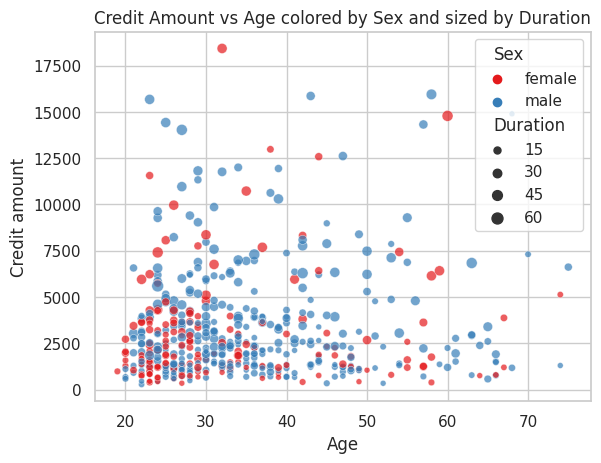

In [29]:
sns.scatterplot(data=df, x='Age', y='Credit amount', hue='Sex', size='Duration', alpha=0.7, palette='Set1')
plt.title("Credit Amount vs Age colored by Sex and sized by Duration")
plt.show()

**Credit Amount distribution accrossing saving acount**

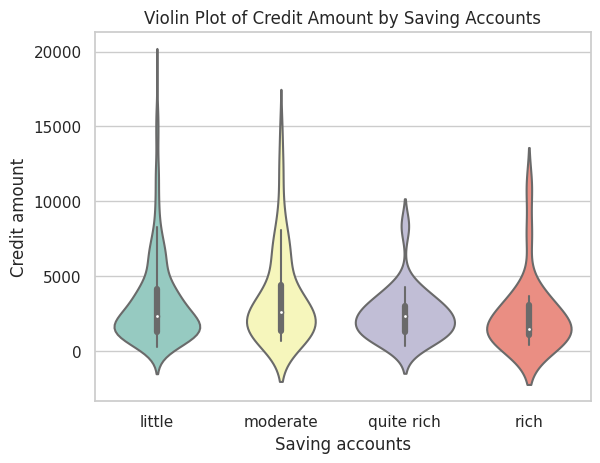

In [30]:
sns.violinplot(data=df, x='Saving accounts', y='Credit amount', palette='Set3')
plt.title("Violin Plot of Credit Amount by Saving Accounts")
plt.show()

**Lets see the percentage of the risk values**

In [31]:
df["Risk"].value_counts(normalize=True) * 100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

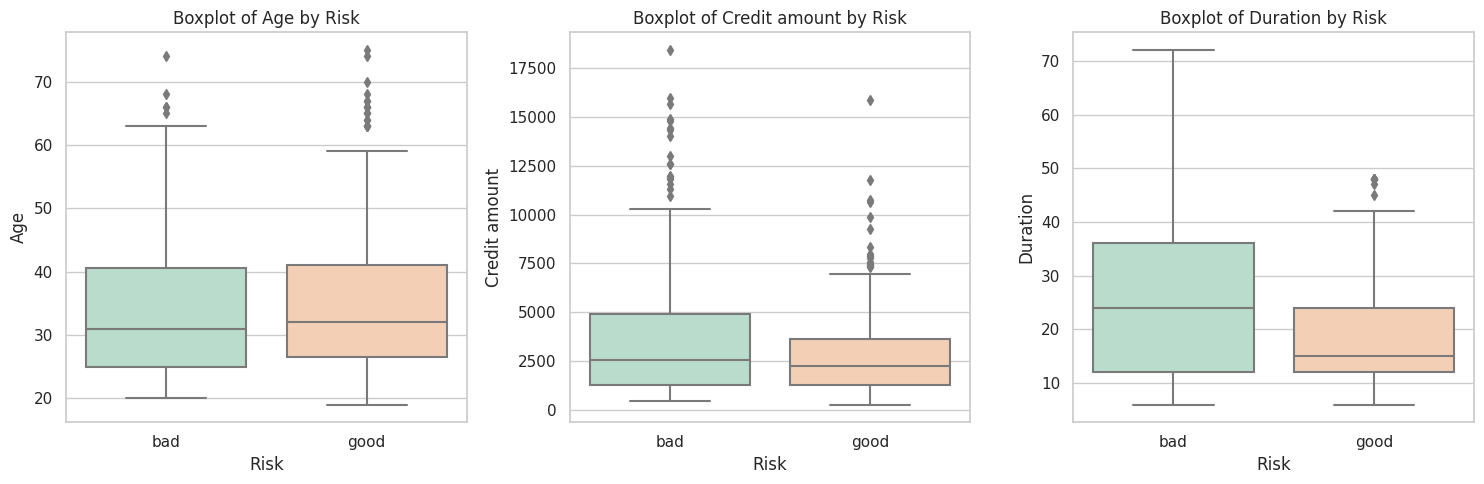

In [32]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='Risk', y=col, palette='Pastel2')
    plt.title(f'Boxplot of {col} by Risk')
plt.tight_layout()
plt.show()

In [33]:
df.groupby('Risk')[['Age', 'Credit amount', 'Duration']].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


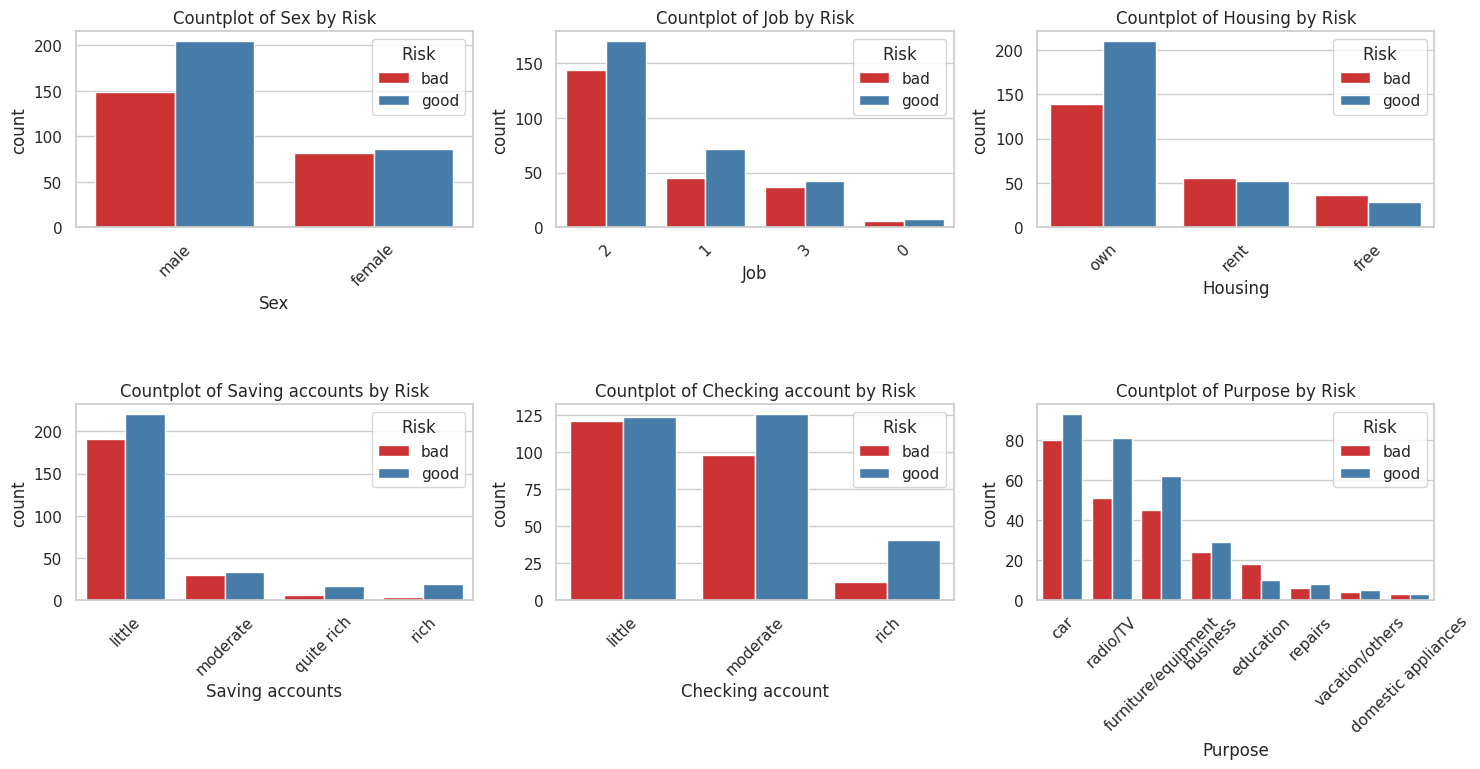

In [34]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, hue='Risk', palette='Set1', order=df[col].value_counts().index)
    plt.title(f'Countplot of {col} by Risk')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### FEATURE ENGINEERING

In [35]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [36]:
features = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration"]

In [37]:
target = "Risk"

In [38]:
df_model = df[features + [target]].copy()

In [39]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [40]:
cat_cols = df_model.select_dtypes(include="object").columns.drop("Risk")

In [41]:
le_dict = {}

In [42]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [43]:
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"label_encoder_{col}.pkl")

In [44]:
le_target = LabelEncoder()

In [45]:
target

'Risk'

In [46]:
df_model[target] = le_target.fit_transform(df_model[target])

In [47]:
df_model[target]

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [48]:
joblib.dump(le_target, "label_encoder_target.pkl")

['label_encoder_target.pkl']

In [49]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


### BUILDING THE DIFFERENT MODELS

In [50]:
X = df_model.drop(columns=[target], axis=1)
y = df_model[target]

In [51]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [52]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
X_train.shape

(417, 8)

In [55]:
X_test.shape

(105, 8)

In [56]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return best_model, accuracy, grid.best_params_

**Building the Decision Tree Model**

In [57]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [58]:
best_dt_model, dt_accuracy, dt_best_params = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


In [59]:
print("Best Decision Tree Model:", best_dt_model)
print("Decision Tree Accuracy:", dt_accuracy)
print("Best Decision Tree Parameters:", dt_best_params)

Best Decision Tree Model: DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=2,
                       min_samples_split=10, random_state=42)
Decision Tree Accuracy: 0.6
Best Decision Tree Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}


**Building the Random Forest Model**

In [60]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [61]:
best_rf_model, rf_accuracy, rf_best_params = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [62]:
print("Best Random Forest Model:", best_rf_model)
print("Random Forest Accuracy:", rf_accuracy)
print("Best Random Forest Parameters:", rf_best_params)

Best Random Forest Model: RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=2,
                       n_estimators=200, n_jobs=-1, random_state=42)
Random Forest Accuracy: 0.6285714285714286
Best Random Forest Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


**Building the Extra Tree Model classifier**

In [ ]:
et = ExtraTreesClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
et_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [64]:
best_et_model, et_accuracy, et_best_params = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [65]:
print("Best Extra Trees Model:", best_et_model)
print("Extra Trees Accuracy:", et_accuracy)
print("Best Extra Trees Parameters:", et_best_params)

Best Extra Trees Model: ExtraTreesClassifier(class_weight='balanced', min_samples_split=10, n_jobs=-1,
                     random_state=42)
Extra Trees Accuracy: 0.6285714285714286
Best Extra Trees Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


**Building the Xgboost Model classifier**

In [66]:
xgb = XGBClassifier(random_state=42, scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum(), use_label_encoder=False, eval_metric='logloss')

/home/redeus/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [67]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [68]:
best_xgb_model, xgb_accuracy, xgb_best_params = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

/home/redeus/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/redeus/.local/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [69]:
print("Best Xgboost Classifier", best_xgb_model)
print("Extra Trees Accuracy:", xgb_accuracy)
print("Best Extra Trees Parameters:", xgb_best_params)

Best Xgboost Classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)
Extra Trees Accuracy: 0.7142857142857143
Best Extra Trees Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


In [71]:
joblib.dump(best_xgb_model, "xgb_credit_model.pkl")

['xgb_credit_model.pkl']